In [ ]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
filenamein="palomas.png"
freq=1e10               # Frequency
wavel=3e8/freq          # Wavelength

ant = 50 # number of antennae

if ant<=1:
    ant=2
    print("You have 2 antennae now") # avoid single-antenna observations
if ant>50:
    ant=50
    print("You have 50 antennae now") # we only have 50 available antennae

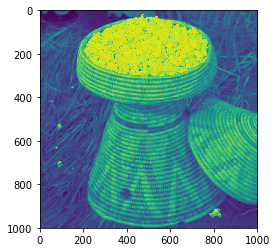

In [32]:
in_img=plt.imread(filenamein)[:,:,0]
width=in_img.shape[0]
plt.imshow(in_img);

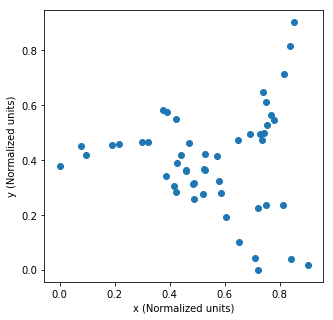

In [33]:
# ALMA extended configuration in a [0,1]x[0,1] square
almal_x=np.array([  5.37451571e-01,   5.85665088e-01,   5.10331468e-01,   4.71301478e-01,
   5.79351413e-01,   5.85378103e-01,   4.60539532e-01,   6.41196728e-01,
   4.89883771e-01,   5.42545559e-01,   6.35241785e-01,   4.30477830e-01,
   6.49591046e-01,   5.21236906e-01,   4.67498924e-01,   5.42473813e-01,
   5.80212369e-01,   5.10546707e-01,   7.17247812e-01,   4.68869278e-01,
   3.33405080e-01,   7.67097144e-01,   6.71990243e-01,   3.54763955e-01,
   8.33003300e-01,   8.17692639e-01,   2.09212226e-01,   8.00107619e-01,
   8.20261157e-01,   8.25599082e-01,   7.99655618e-01,   8.36131439e-01,
   9.00000000e-01,   8.05997991e-01,   9.29939733e-01,   4.33053523e-01,
   4.14542976e-01,   2.38699957e-01,   7.21337351e-01,   8.64930406e-01,
   9.34926101e-01,   8.50631367e-01,   8.47610850e-02,   7.88556464e-01,
   9.05294877e-01,   1.04749605e-01,   8.30750466e-01,   1.00000000e+00,
   7.17463000e-05,   9.46039604e-01])[:ant]
almal_y=np.array([  3.46786220e-01,   4.03165015e-01,   3.96935661e-01,   4.30033034e-01,
   3.05257197e-01,   4.69170993e-01,   3.39361334e-01,   3.60251691e-01,
   4.63193330e-01,   2.84681454e-01,   4.60613497e-01,   3.78121756e-01,
   3.09284254e-01,   5.12587699e-01,   3.12493314e-01,   3.49114362e-01,
   4.05493157e-01,   4.02158251e-01,   5.22214881e-01,   6.07028473e-01,
   5.14475381e-01,   5.49548529e-01,   2.14661004e-01,   5.16759478e-01,
   2.61249017e-01,   5.25046406e-01,   5.02834670e-01,   6.29228000e-05,
   7.18754129e-01,   5.51838918e-01,   2.49690105e-01,   5.85955639e-01,
   2.60154161e-01,   5.47698600e-01,   9.01720938e-01,   6.35840805e-01,
   6.43920088e-01,   5.07365109e-01,   1.13474910e-01,   6.04970898e-01,
   4.29322010e-02,   6.24338524e-01,   5.01129464e-01,   4.94069530e-02,
   7.89592575e-01,   4.61997798e-01,   6.77401290e-01,   2.09721570e-02,
   4.20342929e-01,   1.00000000e+00])[:ant]

# calculate relative positions between antennae (only used to find max baseline)
almal_lx=np.zeros((ant,ant))
almal_ly=np.zeros((ant,ant))
for i in range(ant):
    for j in range(ant):
        almal_lx[i,j]=(almal_x[i]-almal_x[j])
        almal_ly[i,j]=(almal_y[i]-almal_y[j])
        
# get max baseline in original array (between 0 and sqrt(2))
# this ensures that the max baseline is scaled to one
bl_scaled=(np.sqrt(almal_lx**2+almal_ly**2)).max()
plt.figure(figsize=(5,5))
x=almal_x/bl_scaled
y=almal_y/bl_scaled
plt.scatter(x,y)
plt.xlabel("x (Normalized units)")
plt.ylabel("y (Normalized units)")
plt.axis("equal");

In [54]:
lx=np.zeros((ant,ant))
ly=np.zeros((ant,ant))

# calculate relative positions between antennae (for the visibilities)
for i in range(ant):
    for j in range(ant):
        lx[i,j]=(x[i]-x[j])
        ly[i,j]=(y[i]-y[j])


In [61]:
np.ceil(ly)

array([[ 0., -0., -0., ...,  1., -0., -0.],
       [ 1.,  0.,  1., ...,  1., -0., -0.],
       [ 1., -0.,  0., ...,  1., -0., -0.],
       ..., 
       [-0., -0., -0., ...,  0., -0., -0.],
       [ 1.,  1.,  1., ...,  1.,  0., -0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.]])

In [55]:
u=(np.ceil(ly/wavel))            # u values in wavenumber
v=(np.ceil((-1.*lx)/wavel))      # v values in wavenumber
re_u=np.reshape(u,(len(x)**2),order='F') #reshape u into linear form
re_v=np.reshape(v,(len(y)**2),order='F') #reshape v into linear form

In [56]:
# find max uv coverage
scfac=2*np.sqrt((re_u**2+re_v**2)).max() # max uv distance (will be used to scale uv coverage)

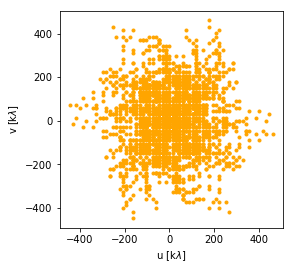

In [57]:
# scale uv points to cover the image width (in pixels)
# this way we have a resolution of exactly 1 px
ore_u=re_u*width/scfac 
ore_v=re_v*width/scfac

plt.figure(figsize=[4,4]) 
plt.plot(ore_u,ore_v,'.',color='orange')
plt.xlabel('u [k$\lambda$]',size='10')
plt.ylabel('v [k$\lambda$]',size='10')

In [50]:
# create an empty matrix same size as in image for multiplying with fft of true sky image
# this acts as a mask in fourier space (resolution of exactly 1 px)
obs_uv_matrix=np.zeros(in_img.shape)          
for k in range(len(ore_u)): 
    int_u=int((ore_u)[k])
    int_v=int((ore_v)[k])
    obs_uv_matrix[int_u,int_v]=1.0

obs_uv_matrix[0,0]=0.0  
print('Available uv grid points:',(obs_uv_matrix>0).sum(),'Total visibilities:',N)

Available uv grid points: 1127 Total visibilities: 2450


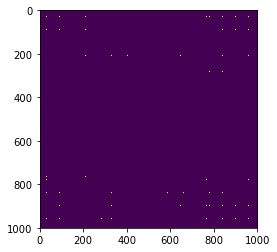

In [51]:
plt.imshow(obs_uv_matrix) # mask

In [62]:
# Transform image to Fourier space, then multiply with uv mask and then apply the inverse FFT to reconstruct image
# Max resolution uv coverage

fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting

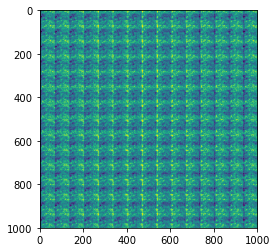

In [63]:
plt.imshow(real_ifft_img)                #Show observed version of input image.


In [68]:
# manual resolution input
myres=100. # in pixels
if myres < 1:
    print("Resolution cannot be smaller than 1 px")
    print("Resolution automatically set to 1 px")
    myres=1.
ore_u=re_u*width/(myres*scfac)
ore_v=re_v*width/(myres*scfac) 

# create an empty matrix same size as in image for multiplying with fft of true sky image
# this acts as a mask in fourier space (resolution of exactly 1 px)
obs_uv_matrix=np.zeros(in_img.shape)          
for k in range(len(ore_u)): 
    int_u=int((ore_u)[k])
    int_v=int((ore_v)[k])
    obs_uv_matrix[int_u,int_v]=1.0

obs_uv_matrix[0,0]=0.0  
print('Available uv grid points:',(obs_uv_matrix>0).sum(),'Total visibilities:',ant*(ant-1))

Available uv grid points: 51 Total visibilities: 2450


In [69]:
# Transform image to Fourier space, then multiply with uv mask and then apply the inverse FFT to reconstruct image
# Max resolution uv coverage

fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting

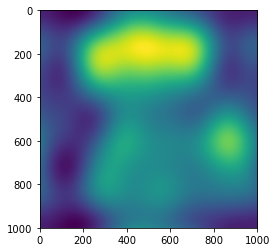

In [70]:
plt.imshow(real_ifft_img)

In [72]:
%%bash
conda list

# packages in environment at /home/ecci/miniconda3:
#
astropy                   2.0.1               np112py27_0  
cairo                     1.14.8                        0  
cffi                      1.9.1                    py27_0  
conda                     4.3.27           py27hff99c7a_0  
conda-env                 2.6.0                         0  
cryptography              1.7.1                    py27_0  
cycler                    0.10.0                   py27_0  
dbus                      1.10.10                       0  
enum34                    1.1.6                    py27_0  
expat                     2.1.0                         0  
fontconfig                2.12.1                        3  
freetype                  2.5.5                         2  
functools32               3.2.3.2                  py27_0  
glib                      2.50.2                        1  
gst-plugins-base          1.8.0                         0  
gstreamer                 1.8.0               